## AIM

In this notebook, I processed the affiliation data. I have the coded results, now I need to fill in data using the dict from ror dataset and I also need to check whether there is any error in the coded data. 

Later, codes here became part of `get_authorid_with_vars.py`

(I need this because when Kristen and I coded the data, if the result is the same as ROR AFF, we didn't input the country code or the aff type. So i need now to retrieve the ROR data to fill the gap. )

In [6]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [7]:
def load_ror_dataset(ROR_RAW_DATA):
    '''read in ROR_DATA
    Output:
        a list of dictionaries
    '''
    with open(ROR_RAW_DATA, 'r') as myfile:
        data=myfile.read()
    data = json.loads(data)
    return data

In [8]:
ror_raw = '../../data/raw/large/ror.json'

In [9]:
ror = load_ror_dataset(ror_raw)

In [10]:
df1 = pd.read_csv('../../data/interim/aff_result/hongtao.csv')
df1.head()

,Unnamed: 0,authorID,doi,url,year,title,journal,numberOfAuthors,authorPosition,firstName,...,googleSearch,affProcessed,authorFullName,affiliation.2,ROR_AFFNAME,matchMethod,aff_prediction,country_code,aff_type,ROR_ID
0,8674,10.1093/jcmc/zmab019+4.0,10.1093/jcmc/zmab019,https://academic.oup.com/jcmc/article/27/1/zma...,2022,"Beyond Anonymity: Network Affordances, Under D...",Journal of Computer-Mediated Communication,5,4,Jana,...,https://www.google.com/search?q=Jana+Egelhofer...,department of communication university of vien...,Jana Egelhofer,"Department of Communication, University of Vie...",University of Vienna,Exact,NaN,NaN,NaN,https://ror.org/03prydq77
1,8675,10.1093/jcmc/zmab019+5.0,10.1093/jcmc/zmab019,https://academic.oup.com/jcmc/article/27/1/zma...,2022,"Beyond Anonymity: Network Affordances, Under D...",Journal of Computer-Mediated Communication,5,5,Sophie,...,https://www.google.com/search?q=Sophie+Lechele...,department of communication university of vien...,Sophie Lecheler,"Department of Communication, University of Vie...",University of Vienna,Exact,NaN,NaN,NaN,https://ror.org/03prydq77
2,26,10.1093/joc/jqab052+5.0,10.1093/joc/jqab052,https://academic.oup.com/joc/article/72/2/187/...,2022,The Effects of Tobacco Coverage in the Public ...,Journal of Communication,18,5,Michelle,...,https://www.google.com/search?q=Michelle+Jeong...,annenberg school for communication university ...,Michelle Jeong,"Annenberg School for Communication, University...",University of Pennsylvania,Exact,NaN,NaN,NaN,https://ror.org/00b30xv10
3,10667,10.1093/ccc/tcac007+1.0,10.1093/ccc/tcac007,https://academic.oup.com/ccc/article/15/2/157/...,2022,"Digitalization, Digitization and Datafication:...","Communication, Culture and Critique",1,1,Saskia,...,https://www.google.com/search?q=Saskia+Wittebo...,the chinese university of hong kong school of ...,Saskia Witteborn,"The Chinese University of Hong Kong, School of...",Chinese University of Hong Kong,Exact,NaN,NaN,NaN,https://ror.org/00t33hh48
4,14,10.1093/joc/jqac012+4.0,10.1093/joc/jqac012,https://academic.oup.com/joc/article/72/3/429/...,2022,"To Misspecify Is Common, to Probe Misspecifica...",Journal of Communication,4,4,Bryant,...,https://www.google.com/search?q=Bryant+Paul+co...,communication science unit the media school in...,Bryant Paul,"Communication Science Unit, The Media School, ...",Indiana University Bloomington,Exact,NaN,NaN,NaN,https://ror.org/02k40bc56


In [11]:
df1 = df1[['authorID', 'country_code', 'aff_type', 'ROR_ID']]
# set(df1.aff_type), set(df1.country_code)

In [12]:
df1[df1.ROR_ID.isnull()]

,authorID,country_code,aff_type,ROR_ID
4121,10.1093/jcmc/zmz031+1.0,CH,1.0,NaN
4127,10.1093/jcmc/zmz031+3.0,CH,1.0,NaN
4162,10.1093/ccc/tcz025+4.0,CR,1.0,NaN
4167,10.1093/ccc/tcz025+2.0,CR,1.0,NaN
4180,10.1093/joc/jqy030+2.0,CH,1.0,NaN
4195,10.1093/joc/jqy030+3.0,CH,1.0,NaN
4460,10.1111/j.1753-9137.2012.01124.x+3.0,CH,1.0,NaN
4846,10.1111/j.1083-6101.2003.tb00220.x+2.0,US,1.0,NaN
4881,10.1111/j.1083-6101.2002.tb00157.x+1.0,US,1.0,NaN
5110,10.1111/j.1468-2885.1993.tb00078.x+2.0,US,1.0,NaN


In [13]:
# pd.isnull(df1.iloc[0, :]['country_code'])

In [14]:
df1[df1.country_code == 'CZ']

,authorID,country_code,aff_type,ROR_ID


In [31]:
df1[df1.country_code == 'GE']

,authorID,country_code,aff_type,ROR_ID,new_country_code,new_afftype
2664,10.1111/j.1083-6101.1997.tb00202.x+1.0,GE,1.0,https://ror.org/05x2bcf33,GE,Education
2714,10.1111/j.1468-2958.1996.tb00372.x+1.0,GE,1.0,https://ror.org/033eqas34,GE,Education


In [15]:
df2 = pd.read_csv('../../data/interim/aff_result/kristen.csv')
df2 = df2[['authorID', 'country_code', 'aff_type', 'ROR_ID']]
# set(df2.aff_type), set(df2.country_code)

In [16]:
df2[df2.country_code == 'CZ']
# these two are correct, after checking. 

,authorID,country_code,aff_type,ROR_ID
4722,10.1111/j.1460-2466.2007.00360.x+3.0,CZ,0.0,https://ror.org/0542dkz21
4731,10.1111/j.1468-2958.2007.00308.x+3.0,CZ,0.0,https://ror.org/0542dkz21


In [30]:
df2[df2.country_code == 'GE']

,authorID,country_code,aff_type,ROR_ID,new_country_code,new_afftype


In [17]:
pd.isnull(df2.iloc[0, :]['country_code'])

True

In [18]:
df2[df2.ROR_ID.isnull()]

,authorID,country_code,aff_type,ROR_ID
4066,10.1093/jcmc/zmz031+2.0,CH,1.0,NaN
4108,10.1093/ccc/tcz025+1.0,CR,1.0,NaN
4142,10.1093/ccc/tcz025+3.0,CR,1.0,NaN
4192,10.1093/joc/jqy030+1.0,CH,1.0,NaN
4247,10.1111/hcre.12125+1.0,US,1.0,NaN
4468,10.1111/j.1753-9137.2012.01124.x+2.0,CH,1.0,NaN
4808,10.1111/j.1468-2958.2005.tb00874.x+3.0,US,0.0,NaN
4993,10.1111/j.1083-6101.2000.tb00347.x+2.0,CH,0.0,NaN
4999,10.1111/j.1083-6101.2000.tb00113.x+6.0,UK,0.0,NaN
5140,10.1111/j.1468-2885.1993.tb00078.x+3.0,US,1.0,NaN


In [19]:
'''this is to build two dictionaries based on ror raw data
'''
ror_cntry_dic = {}
ror_afftype_dic = {}
for i in ror:
    ror_id = i['id']
    cntry = i['country']['country_code']
    try:
        afftype = i['types'][0]
        if afftype == 'Education':
            afftype = afftype
        else:
            afftype = 'Non Education'
    except:
        afftype = None
    ror_cntry_dic[ror_id] = cntry
    ror_afftype_dic[ror_id] = afftype

In [20]:
def get_new_cntry_code(row):
    if pd.isnull(row['country_code']):
        new_country_code = ror_cntry_dic[row['ROR_ID']]
    else:
        new_country_code = row['country_code']
    return new_country_code

In [21]:
set(df1[df1.aff_type.notnull()].aff_type)

{0.0, 1.0}

In [22]:
set(df2[df2.aff_type.notnull()].aff_type)

{0.0, 1.0}

In [23]:
def get_new_afftype(row):
    if pd.isnull(row['aff_type']):
        new_afftype = ror_afftype_dic[row['ROR_ID']]
    elif row['aff_type'] == 1:
        new_afftype = 'Education'
    elif row['aff_type'] == 0:
        new_afftype = 'Non Education'
    return new_afftype

In [24]:
df1['new_country_code'] = df1.apply(get_new_cntry_code, axis = 1)
df1['new_afftype'] = df1.apply(get_new_afftype, axis = 1)
df2['new_country_code'] = df2.apply(get_new_cntry_code, axis = 1)
df2['new_afftype'] = df2.apply(get_new_afftype, axis = 1)

In [25]:
df = pd.concat([df1, df2], ignore_index = True)
df.head()

,authorID,country_code,aff_type,ROR_ID,new_country_code,new_afftype
0,10.1093/jcmc/zmab019+4.0,NaN,NaN,https://ror.org/03prydq77,AT,Education
1,10.1093/jcmc/zmab019+5.0,NaN,NaN,https://ror.org/03prydq77,AT,Education
2,10.1093/joc/jqab052+5.0,NaN,NaN,https://ror.org/00b30xv10,US,Education
3,10.1093/ccc/tcac007+1.0,NaN,NaN,https://ror.org/00t33hh48,CN,Education
4,10.1093/joc/jqac012+4.0,NaN,NaN,https://ror.org/02k40bc56,US,Education


<AxesSubplot:xlabel='new_country_code', ylabel='count'>

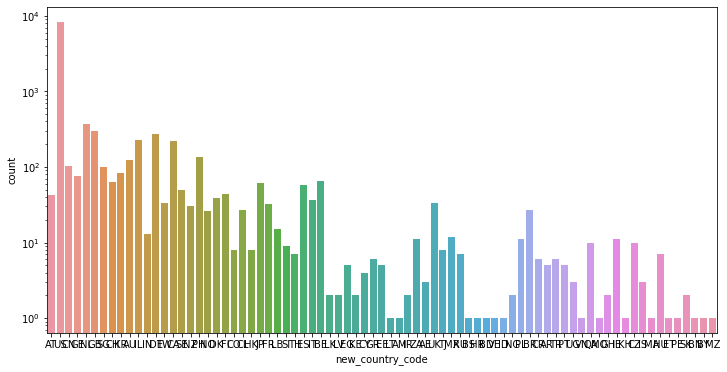

In [26]:
f, ax = plt.subplots(figsize=(12,6))
ax.set(yscale = 'log')
sns.countplot(x = 'new_country_code', data = df, ax = ax)

<AxesSubplot:xlabel='new_afftype', ylabel='count'>

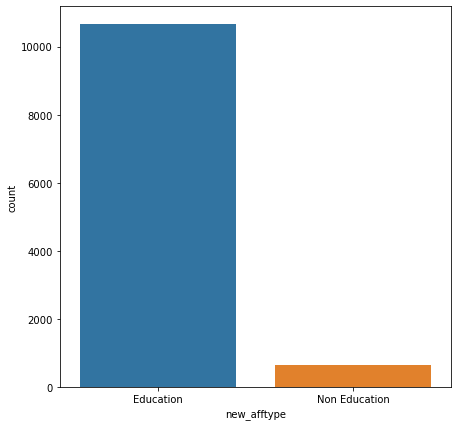

In [27]:
f, ax = plt.subplots(figsize=(7, 7))
# ax.set(yscale='log')
sns.countplot(x = 'new_afftype', data = df, ax = ax)

In [28]:
df.shape

(11304, 6)

In [29]:
df.to_csv('aff_df.csv', index = False)